<a href="https://colab.research.google.com/github/ankithmanchale/Deep-Learning/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [32]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

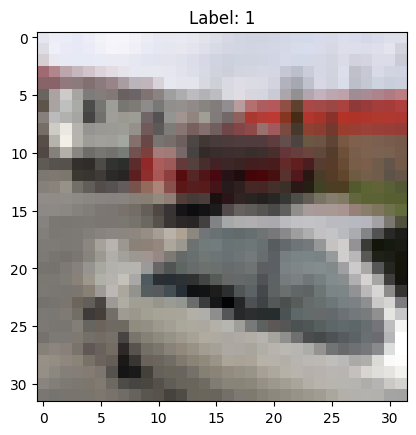

In [33]:
# Display an image from the CIFAR-10 dataset
plt.imshow(x_train[49999])
plt.title(f'Label: {y_train[49999][0]}')
plt.show()

In [34]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
image_size = x_train.shape[1]
print(image_size)

32


In [37]:
input_size = image_size * image_size
print(input_size)

1024


In [38]:
# Define model parameters
batch_size = 64 # No.of samples to be used in each batch during training
hidden_units = 512 # No.of neurons in the hidden layer of the neural network

In [39]:
# prompt: what is the reason to use Conv2D, MaxPooling2D, Flatten over dense?

# In the context of image classification tasks like the CIFAR-10 dataset, using Conv2D, MaxPooling2D, and Flatten layers over dense layers offers several advantages due to their ability to exploit spatial hierarchies in images:

# **Conv2D (Convolutional Layers):**

# - **Feature Extraction:** Conv2D layers learn to extract local features like edges, textures, and patterns from the input images by applying learnable filters. These filters slide across the image, capturing spatial relationships between pixels.
# - **Parameter Efficiency:** Conv2D layers share weights across different spatial locations, significantly reducing the number of parameters compared to dense layers, which connect every input to every output.
# - **Translation Invariance:** Convolutions are inherently translation invariant, meaning they can recognize features regardless of their position in the image.

# **MaxPooling2D (Max Pooling Layers):**

# - **Dimensionality Reduction:** MaxPooling2D layers downsample the feature maps produced by convolutional layers, reducing the number of parameters and computation while retaining important information.
# - **Spatial Invariance:** Max pooling helps the model become more robust to small variations in the position of features within the image.

# **Flatten:**

# - **Transition to Dense Layers:** The Flatten layer converts the multi-dimensional feature maps into a one-dimensional vector, enabling the use of dense layers for final classification.

# **Why use Conv2D, MaxPooling2D, Flatten over Dense for image classification?**

# - **Exploiting Spatial Information:** Dense layers treat each pixel as an independent feature, ignoring the spatial relationships between them. Convolutions and pooling operations, on the other hand, leverage the spatial structure of images, leading to better feature extraction and improved performance.
# - **Reduced Overfitting:** The reduced number of parameters in convolutional networks compared to dense networks helps prevent overfitting, especially when dealing with limited training data.


In [40]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,818 (514.91 KB)

 Trainable params: 131,818 (514.91 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
# Train the model
model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=batch_size)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 171ms/step - accuracy: 0.3199 - loss: 1.8173
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 173ms/step - accuracy: 0.5705 - loss: 1.2112
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 173ms/step - accuracy: 0.6518 - loss: 0.9912
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 171ms/step - accuracy: 0.6957 - loss: 0.8615
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 172ms/step - accuracy: 0.7299 - loss: 0.7720
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 0.7518 - loss: 0.7133
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 169ms/step - accuracy: 0.7680 - loss: 0.6531
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 172ms/step - accuracy: 0.7850 - loss: 0.6105
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 170ms/step - accuracy: 0.8042 - loss: 0.5637
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 171ms/step - accuracy: 0.8190 - loss: 0.5151


In [44]:
# `verbose` parameter controls the amount of information displayed during training. It typically accepts integer values:

# verbose=0: Silent mode. No output is printed during training.
# verbose=1: Progress bar. Displays a progress bar showing the completion of each epoch.
# verbose=2: One line per epoch. Prints a summary line for each epoch, including loss and metrics.

In [45]:
# Evaluate the model with verbose=0
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy where verbose=0: {test_acc}')


Test accuracy where verbose=0: 0.7229999899864197


In [46]:
# Evaluate the model with verbose=1
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'\nTest accuracy where verbose=1: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7239 - loss: 0.8242

Test accuracy where verbose=1: 0.7229999899864197


In [47]:
# Evaluate the model with verbose=2
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy where verbose=2: {test_acc}')

313/313 - 6s - 20ms/step - accuracy: 0.7230 - loss: 0.8298

Test accuracy where verbose=2: 0.7229999899864197
